# Building a Libor Curve

This is an example of a replication of a BBG example from

https://github.com/vilen22/curve-building/blob/master/Bloomberg%20Curve%20Building%20Replication.xlsx

Agreement is very good however some issues about date generation need to be checked.

In [31]:
# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  
# See the license for more details.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from financepy.finutils.FinDate import FinDate
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinCalendar import *
from financepy.market.curves.FinLiborCurve import FinLiborCurve
from financepy.products.libor.FinLiborFRA import FinLiborFRA
from financepy.products.libor.FinLiborDeposit import FinLiborDeposit
from financepy.products.libor.FinLiborSwap import FinLiborSwap
from financepy.products.libor.FinLiborFuture import FinLiborFuture

## Creating the Libor Instruments

In [15]:
spotDate = FinDate(6, 6, 2018)

### Load up the deposits first

In [16]:
spotDays = 0
settlementDate = spotDate.addWorkDays(spotDays)

In [17]:
depoDCCType = FinDayCountTypes.THIRTY_E_360_ISDA
depos = []
depositRate = 0.0231381
maturityDate = settlementDate.addMonths(3)
depo = FinLiborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

### Create Strips of Interest Rate Futures 

In [18]:
futs = []
fut = FinLiborFuture(spotDate, 1) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 2) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 3) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 4) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 5) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 6) ; futs.append(fut)

### Convert Interest Rate Futures to FRAs

Need to supply futures price and the convexity (in percent)

In [19]:
fras = [None]*6
fras[0] = futs[0].toFRA(97.6675,-0.00005)
fras[1] = futs[1].toFRA(97.5200,-0.00060)
fras[2] = futs[2].toFRA(97.3550,-0.00146)
fras[3] = futs[3].toFRA(97.2450,-0.00263)
fras[4] = futs[4].toFRA(97.1450,-0.00411)
fras[5] = futs[5].toFRA(97.0750,-0.00589)

### Then we load up swap rates

In [20]:
accrual = FinDayCountTypes.THIRTY_360
freq = FinFrequencyTypes.SEMI_ANNUAL
longEnd = FinDateGenRuleTypes.BACKWARD

In [21]:
spotDays = 2
settlementDate = spotDate.addWorkDays(spotDays)
notional = 1000000

In [22]:
swaps = []
swap = FinLiborSwap(settlementDate, "2Y", (2.77417+2.77844)/200, freq, accrual, notional); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "3Y", (2.86098+2.86582)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "4Y", (2.90240+2.90620)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "5Y", (2.92944+2.92906)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "6Y", (2.94001+2.94499)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "7Y", (2.95352+2.95998)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "8Y", (2.96830+2.97400)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "9Y", (2.98403+2.98817)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "10Y", (2.99716+3.00394)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "11Y", (3.01344+3.01596)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "12Y", (3.02276+3.02684)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "15Y", (3.04092+3.04508)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "20Y", (3.04417+3.05183)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "25Y", (3.03219+3.03621)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "30Y", (3.01030+3.01370)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "40Y", (2.96946+2.97354)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "50Y", (2.91552+2.93748)/200, freq, accrual); swaps.append(swap)

## Build the Curve

In [23]:
liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, depos, fras, swaps)

## Curve Examination

Generate a vector of time points and then generate zero rates and forward rates

In [24]:
times = np.linspace(0.0,50,500)
zeroRates = liborCurve.zeroRate(times)
fwdRates = liborCurve.fwd(times)

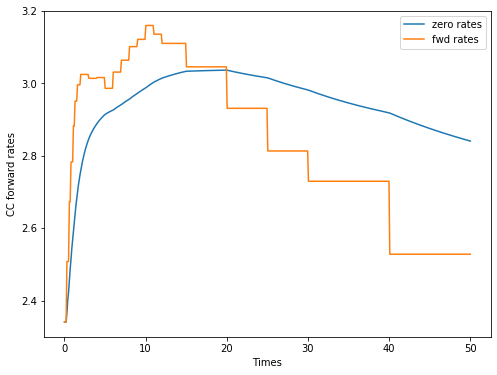

In [25]:
plt.figure(figsize=(8,6))
plt.plot(times, zeroRates*100, label="zero rates")
plt.plot(times, fwdRates*100, label = "fwd rates")
plt.xlabel("Times")
plt.ylabel("CC forward rates")
plt.legend();

We see that the forward rates are piecewise flat

In [26]:
liborCurve.print()

TIME: DISCOUNT FACTOR
0.0: 1.0
0.2464119679554925: 0.9942487432882308
0.2820048077712859: 0.9933743965105937
0.5311546864818394: 0.9871873260849587
0.780304565192393: 0.9806344504748489
1.0294544439029465: 0.9738589440055212
1.2786043226135: 0.9668911239635243
1.5277542013240535: 0.9598088276643569
2.0014127619496116: 0.9462854512894789
3.0007501875468865: 0.9181115683333075
4.000087613144162: 0.8908725409589888
4.999425038741437: 0.8644222609249615
6.006976196603895: 0.8388020498710722
7.00357571144611: 0.8138428561899081
8.000175226288324: 0.7893686514147824
8.999512651885599: 0.7652788705611039
10.001587988237935: 0.7417121891745818
11.00092541383521: 0.7186568913860792
12.005738660942606: 0.6963659230197796
15.001013026979372: 0.6344215050797687
20.000438065720807: 0.5448184206405027
24.999863104462246: 0.4705596359252432
30.002026053958744: 0.4087920290158814
40.00635195295174: 0.31110819018736086
50.00246411967955: 0.24163937363118132



In [28]:
swaps[0].printFixedLeg()

START DATE: FRI 8 JUN 2018
MATURITY DATE: MON 8 JUN 2020
COUPON (%): 2.776305
FIXED LEG FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FIXED LEG DAY COUNT: FinDayCountTypes.THIRTY_360
VALUATION DATE FRI 8 JUN 2018
PAYMENT_DATE     YEAR_FRAC        FLOW         DF         DF*FLOW       CUM_PV
MON 10 DEC 2018  0.5055556     14035.76   0.98779751     13864.49     13864.49
MON 10 JUN 2019  0.5000000     13881.52   0.97452696     13527.92     27392.41
 MON 9 DEC 2019  0.4972222     13804.41   0.96050696     13259.23     40651.64
 MON 8 JUN 2020  0.4972222     13804.41   0.94628545     13062.91     53714.55


In [30]:
swaps[0].printFloatLeg()

START DATE: FRI 8 JUN 2018
MATURITY DATE: MON 8 JUN 2020
SPREAD COUPON (%): 0.0
FLOAT LEG FREQUENCY: FinFrequencyTypes.QUARTERLY
FLOAT LEG DAY COUNT: FinDayCountTypes.THIRTY_360
VALUATION DATE FRI 8 JUN 2018
         *** FIRST FLOATING RATE PAYMENT IS IMPLIED ***
PAYMENT_DATE     YEAR_FRAC        FLOW         DF         DF*FLOW       CUM_PV
MON 10 SEP 2018  0.2555556      6056.83   0.99397963      6020.37      6020.37
MON 10 DEC 2018  0.2500000      6258.49   0.98779751      6182.12     12202.49
 FRI 8 MAR 2019  0.2444444      6420.24   0.98149607      6301.44     18503.93
MON 10 JUN 2019  0.2555556      7151.28   0.97452696      6969.11     25473.04
 MON 9 SEP 2019  0.2472222      7181.78   0.96757802      6948.94     32421.98
 MON 9 DEC 2019  0.2500000      7361.81   0.96050696      7071.06     39493.04
 MON 9 MAR 2020  0.2500000      7480.77   0.95337498      7131.98     46625.02
 MON 8 JUN 2020  0.2472222      7491.95   0.94628545      7089.53     53714.55


Copyright (c) 2020 Dominic O'Kane